# 🌠Project 2: Higgs Boson Event Detection

The LHC collides bunches of protons every 50 nanoseconds within each of its four experiments, each crossing producing a random number of proton-proton collisions (with a Poisson expectation between 10 and 35, depending on the LHC parameters) called events8. Two colliding protons produce a small firework in which part of the kinetic energy of the protons is converted into new particles. Most of the resulting particles are very unstable and decay quickly into a cascade of lighter particles.

Based on these properties, the properties of the decayed parent particle are inferred, and the inference chain is continued until reaching the heaviest primary particles. given the elusive nature of neutrinos, their minuscule mass, and the way they oscillate between flavors, one could very well imagine that the mass of leptons comes from an entirely different mechanism. Hence the importance of measuring as precisely as possible the coupling of the Higgs to tau arises.

Particle colliders enable us to probe the fundamental nature of matter by observing exotic particles produced by high-energy collisions. Because the experimental measurements from these collisions are necessarily incomplete and imprecise, machine learning algorithms play a major role in the analysis of experimental data. The high-energy physics community typically relies on standardized machine learning software packages for this analysis and devotes substantial effort towards improving statistical power by hand-crafting high-level features derived from the raw collider measurements.

With the given dataset, **we have to classify whether the given event was a signal or a background noise in the process of decay for Higgs particle acceleration.**

Metric - **Precision**


In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("training.csv")
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [5]:
df.shape

(250000, 33)

In [6]:
#checking missing values
df.isnull().any().sum()

0

In [7]:
# statistical measures about the data
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [8]:
# checking the distribution of Target Varibale
df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [9]:
df.groupby('Label').mean()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
Label,,,,,,,,,,,,,,,,,,,,,
b,224882.359812,-119.186024,58.208042,81.596313,49.047438,-754.900355,-692.338008,-755.329855,2.366178,19.163180,...,197.419574,0.884929,-408.976389,-452.416215,-452.420779,-741.135235,-755.364462,-755.358911,63.560706,2.501018
s,225224.207279,85.568853,32.036287,80.387179,74.869878,-619.259794,-426.480218,-621.167191,2.386378,18.445728,...,233.540845,1.159968,-231.992190,-297.275085,-297.282305,-598.857487,-620.415028,-620.416985,91.295672,0.008078


<AxesSubplot:xlabel='Label', ylabel='count'>

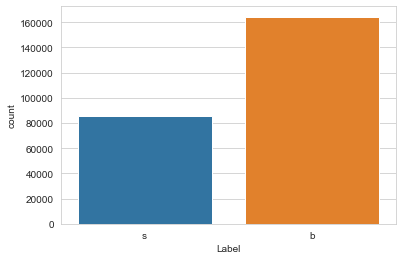

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

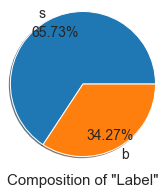

In [11]:
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["Label"].value_counts(),
        labels=list(df["Label"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Label"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [12]:
object_columns = df.select_dtypes(include=['object']).columns

In [13]:
object_columns

Index(['Label'], dtype='object')

#### Encoding Concept 

In [14]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

df['Label']= label_encoder.fit_transform(df['Label']) 
print(df.head())

   EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

### Building a Model

In [16]:
X = df.drop(columns='Label', axis=1)
Y = df['Label']

In [17]:
X

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611


In [18]:
Y

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int32

In [19]:
### Splitting the data into training data & Testing data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(250000, 32) (225000, 32) (25000, 32)


In [22]:
### Feature selection

In [23]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.00000000e+00, 1.49700278e-01, 8.75929857e-02, 7.85629182e-02,
       2.20140598e-02, 4.46426505e-02, 4.20653596e-02, 4.50302985e-02,
       1.74551350e-02, 0.00000000e+00, 2.65043384e-02, 3.96888300e-02,
       4.67120815e-02, 4.03218969e-02, 5.38449942e-02, 7.77749027e-03,
       8.68630570e-04, 1.78474367e-03, 1.10778631e-02, 1.33143731e-03,
       1.59002771e-02, 3.49998732e-04, 1.77970418e-02, 2.65474139e-02,
       2.76307422e-02, 3.01534790e-02, 2.03806536e-02, 2.41994046e-02,
       3.15214378e-02, 2.47173220e-02, 1.83897852e-02, 6.43061974e-01])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Weight                         0.643062
DER_mass_MMC                   0.149700
DER_mass_transverse_met_lep    0.087593
DER_mass_vis                   0.078563
PRI_tau_pt                     0.053845
DER_met_phi_centrality         0.046712
DER_prodeta_jet_jet            0.045030
DER_deltaeta_jet_jet           0.044643
DER_mass_jet_jet               0.042065
DER_lep_eta_centrality         0.040322
DER_pt_ratio_lep_tau           0.039689
PRI_jet_subleading_eta         0.031521
PRI_jet_leading_eta            0.030153
PRI_jet_leading_pt             0.027631
PRI_jet_num                    0.026547
DER_sum_pt                     0.026504
PRI_jet_subleading_phi         0.024717
PRI_jet_subleading_pt          0.024199
DER_pt_h                       0.022014
PRI_jet_leading_phi            0.020381
PRI_jet_all_pt                 0.018390
PRI_met_sumet                  0.017797
DER_deltar_tau_lep             0.017455
PRI_met                        0.015900
PRI_lep_eta                    0.011078


<AxesSubplot:>

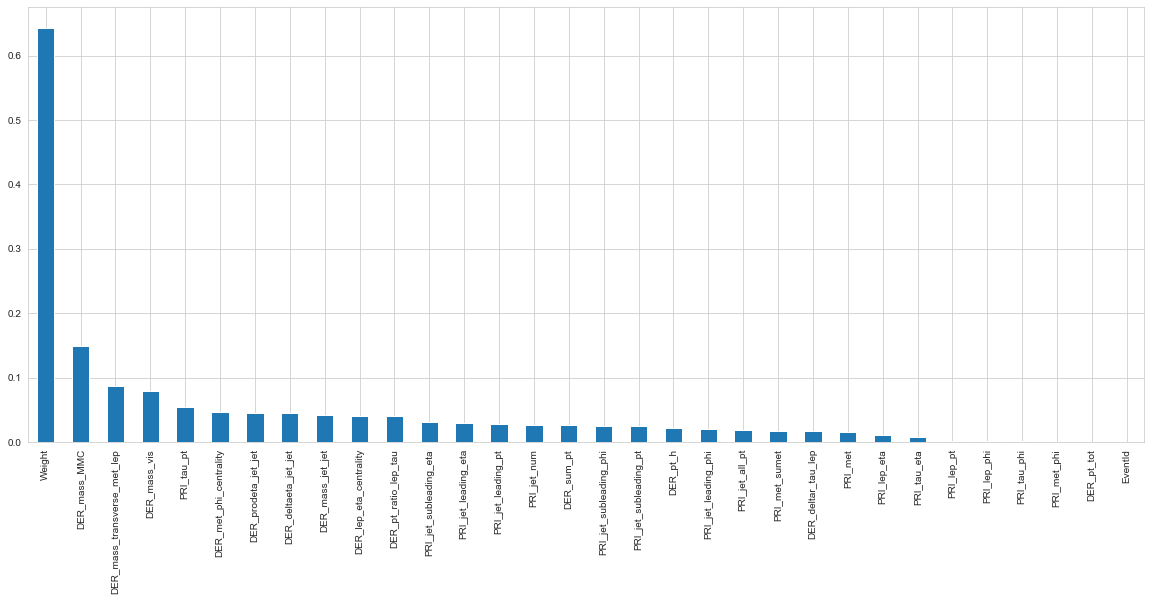

In [25]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'PRI_tau_pt', 'Weight'],
      dtype='object')

In [28]:
df['DER_mass_MMC'].value_counts

<bound method IndexOpsMixin.value_counts of 0         138.470
1         160.937
2        -999.000
3         143.905
4         175.864
           ...   
249995   -999.000
249996   -999.000
249997    105.457
249998     94.951
249999   -999.000
Name: DER_mass_MMC, Length: 250000, dtype: float64>

In [29]:
df['DER_mass_transverse_met_lep'].value_counts

<bound method IndexOpsMixin.value_counts of 0          51.655
1          68.768
2         162.172
3          81.417
4          16.915
           ...   
249995     71.989
249996     58.179
249997     60.526
249998     19.362
249999     72.756
Name: DER_mass_transverse_met_lep, Length: 250000, dtype: float64>

In [30]:
df['DER_mass_vis'].value_counts

<bound method IndexOpsMixin.value_counts of 0          97.827
1         103.235
2         125.953
3          80.943
4         134.805
           ...   
249995     36.548
249996     68.083
249997     75.839
249998     68.812
249999     70.831
Name: DER_mass_vis, Length: 250000, dtype: float64>

In [31]:
df['PRI_tau_pt'].value_counts

<bound method IndexOpsMixin.value_counts of 0         32.638
1         42.014
2         32.154
3         22.647
4         28.209
           ...  
249995    24.754
249996    23.416
249997    35.636
249998    27.944
249999    43.003
Name: PRI_tau_pt, Length: 250000, dtype: float64>

In [32]:
df['Weight'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0.002653
1         2.233584
2         2.347389
3         5.446378
4         6.245333
            ...   
249995    4.505083
249996    2.497259
249997    0.018636
249998    1.681611
249999    1.877474
Name: Weight, Length: 250000, dtype: float64>

In [33]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

In [34]:
### Standardize the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [37]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
import tensorflow as tf
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [39]:
# fit the keras model on the dataset
history = model.fit(X_train_std, Y_train, epochs=100, validation_split=0.1,batch_size=10)


Epoch 1/100
20250/20250 [==============================] - 40s 2ms/step - loss: 0.0878 - accuracy: 0.9677 - precision: 0.9341 - recall: 0.9744 - val_loss: 0.1169 - val_accuracy: 0.9515 - val_precision: 0.8935 - val_recall: 0.9756
Epoch 2/100
20250/20250 [==============================] - 34s 2ms/step - loss: 0.0449 - accuracy: 0.9874 - precision: 0.9741 - recall: 0.9895 - val_loss: 0.0133 - val_accuracy: 0.9968 - val_precision: 0.9910 - val_recall: 0.9997
Epoch 3/100
20250/20250 [==============================] - 34s 2ms/step - loss: 0.0374 - accuracy: 0.9892 - precision: 0.9768 - recall: 0.9919 - val_loss: 0.0371 - val_accuracy: 0.9864 - val_precision: 0.9862 - val_recall: 0.9742
Epoch 4/100
20250/20250 [==============================] - 34s 2ms/step - loss: 0.0262 - accuracy: 0.9931 - precision: 0.9848 - recall: 0.9951 - val_loss: 0.0085 - val_accuracy: 0.9989 - val_precision: 0.9976 - val_recall: 0.9994
Epoch 5/100
20250/20250 [==============================] - 34s 2ms/step - loss: 

20250/20250 [==============================] - 34s 2ms/step - loss: 0.0578 - accuracy: 0.9813 - precision: 0.9485 - recall: 0.9996 - val_loss: 0.1667 - val_accuracy: 0.9416 - val_precision: 0.8551 - val_recall: 1.0000
Epoch 37/100
20250/20250 [==============================] - 33s 2ms/step - loss: 0.0597 - accuracy: 0.9806 - precision: 0.9471 - recall: 0.9992 - val_loss: 0.0062 - val_accuracy: 0.9991 - val_precision: 0.9974 - val_recall: 1.0000
Epoch 38/100
20250/20250 [==============================] - 33s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - precision: 0.9995 - recall: 0.9999 - val_loss: 5.8684e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 39/100
20250/20250 [==============================] - 32s 2ms/step - loss: 0.0032 - accuracy: 0.9995 - precision: 0.9992 - recall: 0.9994 - val_loss: 2.7480e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 40/100
20250/20250 [==============================] - 34s 2ms/step - loss: 

20250/20250 [==============================] - 37s 2ms/step - loss: 0.1623 - accuracy: 0.9439 - precision: 0.8592 - recall: 1.0000 - val_loss: 0.1645 - val_accuracy: 0.9428 - val_precision: 0.8575 - val_recall: 1.0000
Epoch 72/100
20250/20250 [==============================] - 36s 2ms/step - loss: 0.1624 - accuracy: 0.9439 - precision: 0.8592 - recall: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9428 - val_precision: 0.8575 - val_recall: 1.0000
Epoch 73/100
20250/20250 [==============================] - 36s 2ms/step - loss: 0.1623 - accuracy: 0.9439 - precision: 0.8592 - recall: 1.0000 - val_loss: 0.1648 - val_accuracy: 0.9428 - val_precision: 0.8575 - val_recall: 1.0000
Epoch 74/100
20250/20250 [==============================] - 34s 2ms/step - loss: 0.1623 - accuracy: 0.9439 - precision: 0.8592 - recall: 1.0000 - val_loss: 0.1645 - val_accuracy: 0.9428 - val_precision: 0.8575 - val_recall: 1.0000
Epoch 75/100
20250/20250 [==============================] - 34s 2ms/step - loss: 0.1624 -

ValueError: in user code:

    File "C:\Users\monas\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\monas\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\monas\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\monas\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\monas\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\monas\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 32)


In [49]:
# evaluate the keras model
score = model.evaluate(X_train_std, Y_train)


7032/7032 [==============================] - 17s 2ms/step - loss: 0.1623 - accuracy: 0.9438 - precision: 0.8590 - recall: 1.0000


In [50]:
print(score)

[0.16232426464557648, 0.9437733292579651, 0.8590386509895325, 1.0]


In [53]:
print('Accuracy: %.2f' % (score[1]*100))
print('precision: %.2f' % (score[2]*100))
print('recall: %.2f' % (score[3]*100))

Accuracy: 94.38
precision: 85.90
recall: 100.00


In [58]:
# evaluate the keras model
Test_score = model.evaluate(X_test_std, Y_test)
print('Accuracy: %.2f' % (Test_score[1]*100))
print('Precision: %f' % (Test_score[2]*100))
print('Recall: %f' % (Test_score[3]*100))

782/782 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9417 - precision: 0.8546 - recall: 1.0000
Accuracy: 94.17
Precision: 85.460711
Recall: 100.000000


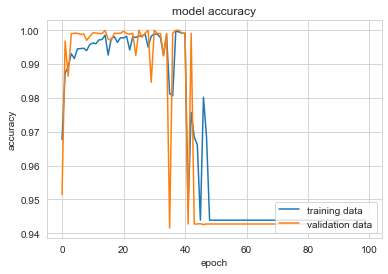

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

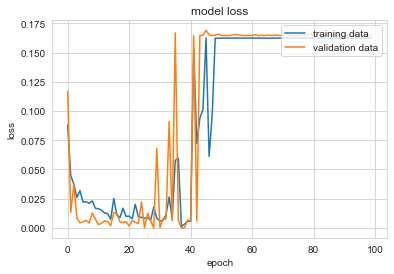

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [61]:
#saving the model

In [62]:

model.save('keras_model.h5')

In [63]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')

# Explainable AI

In [64]:
import shap
shap.initjs()

In [65]:
X_sample =pd.DataFrame( X_train_new,columns = X_train.columns[sel_five_cols.get_support()]).sample(100)

In [66]:
X_sample

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt,Weight
207663,178.963,74.171,126.757,55.504,0.002653
103951,-999.000,108.869,84.439,31.715,0.744056
210372,168.496,85.498,133.870,32.206,2.714901
27573,154.133,0.851,112.264,26.432,0.018636
5612,131.243,11.564,65.135,38.009,0.001503
...,...,...,...,...,...
95211,90.400,10.852,48.626,25.601,0.073899
127158,121.901,11.238,76.629,52.637,0.001503
199715,-999.000,60.662,77.543,34.598,5.104469
217606,91.664,11.565,71.634,67.616,0.001502


In [67]:
explainer = shap.KernelExplainer(model.predict,X_train_new)

7032/7032 [==============================] - 14s 1ms/step


Using 225000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [68]:
shap_values = explainer.shap_values(X_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

 54791/210938 [======>.......................] - ETA: 1:47

KeyboardInterrupt: 

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [ ]:
###force plot
shap.force_plot(explainer.expected_value[0], shap_values[0], features = X_sample)

In [ ]:
shap.summary_plot(shap_values[0], features = X_sample)